In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [3]:
 data = pd.read_csv(r"C:\Users\ravin\Music\India_Crime - Copy\35_Human_rights_violation_by_police_2001_2010.csv")

In [4]:
data


,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2262,Meghalaya,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2263,Nagaland,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2264,Odisha,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),5.0,1.0,0.0
2265,Uttar Pradesh,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),6.0,5.0,0.0


In [5]:
data1 = data[data['Sub_Group_Name']!='12. Total (Sum of 1-11 Above)']
data1 = data1.reset_index()
data2 = data1.drop(['index'], axis=1)

# Distribution of Data

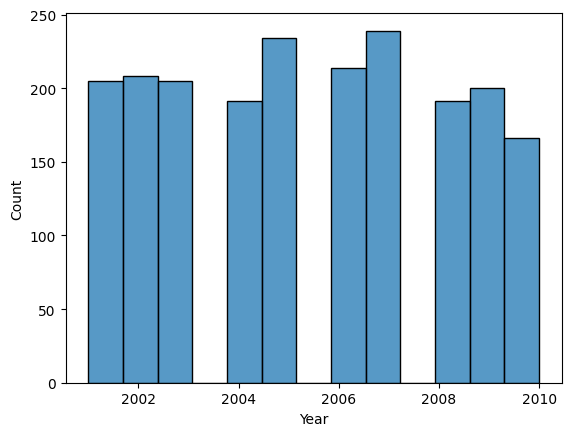

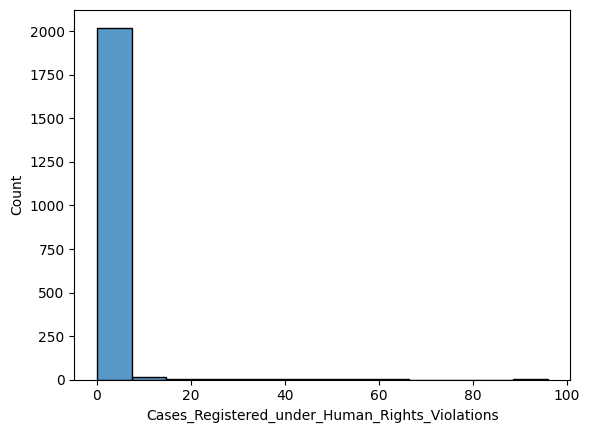

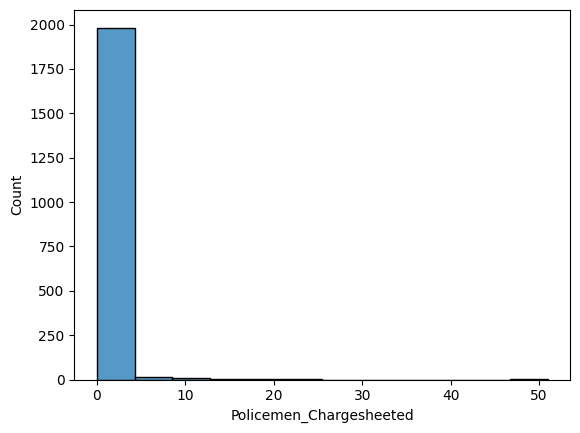

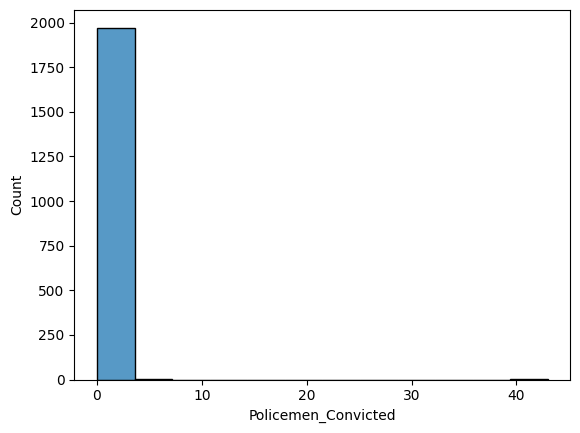

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data2.columns:
    if data2[column].dtypes != 'object':
        sns.histplot(data=data2, x=column)
        plt.show()

# spread of data

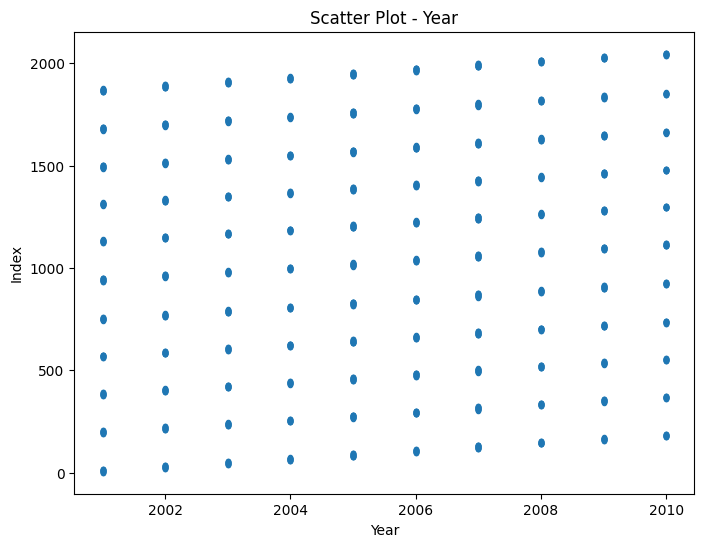

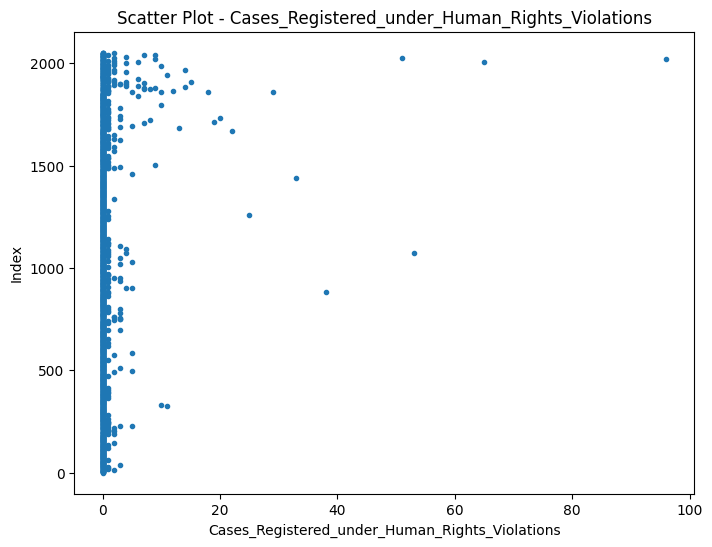

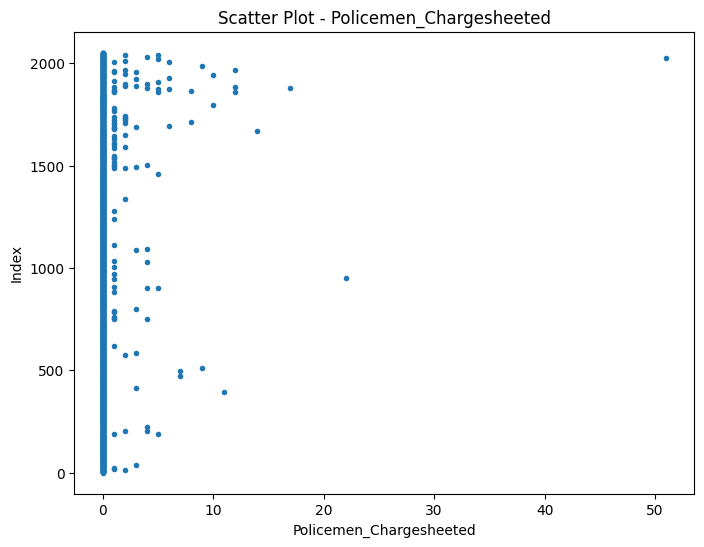

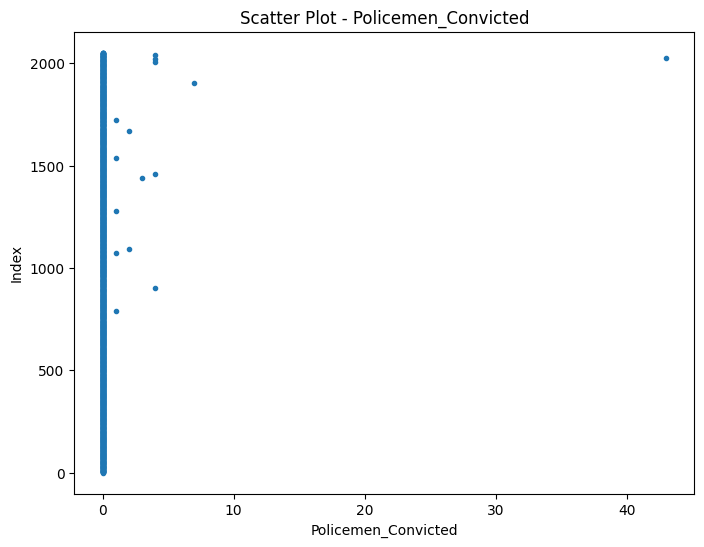

In [7]:
import matplotlib.pyplot as plt

for column in data2.columns:
    if data2[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(data2[column], range(len(data2)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()



# outliers removal

In [8]:
import numpy as np

In [9]:
mean = np.mean(data2)
std = np.std(data2)
threshold = 3
z_scores = (data2 - mean) / std

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

In [10]:
outliers = data2[np.abs(z_scores) > threshold]
df = data2[~data2.isin(outliers)].dropna()

In [11]:
df1 = df.reset_index()
df2 = df1.drop(['index'], axis=1)

In [12]:
df2

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1943,Meghalaya,2010,HR_Others Violations by Police,11. Others,0.0,0.0,0.0
1944,Nagaland,2010,HR_Others Violations by Police,11. Others,0.0,0.0,0.0
1945,Odisha,2010,HR_Others Violations by Police,11. Others,0.0,0.0,0.0
1946,Uttar Pradesh,2010,HR_Others Violations by Police,11. Others,2.0,0.0,0.0


# Loss of Data

In [13]:
318/1948*100

16.324435318275153

# after removing outliers


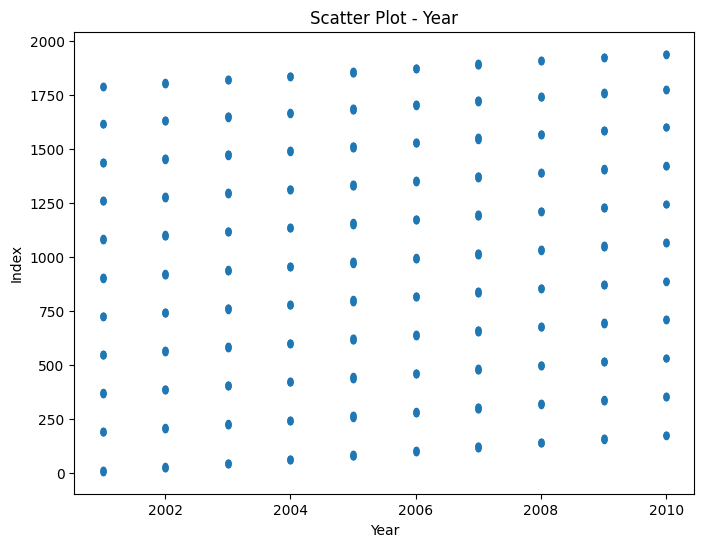

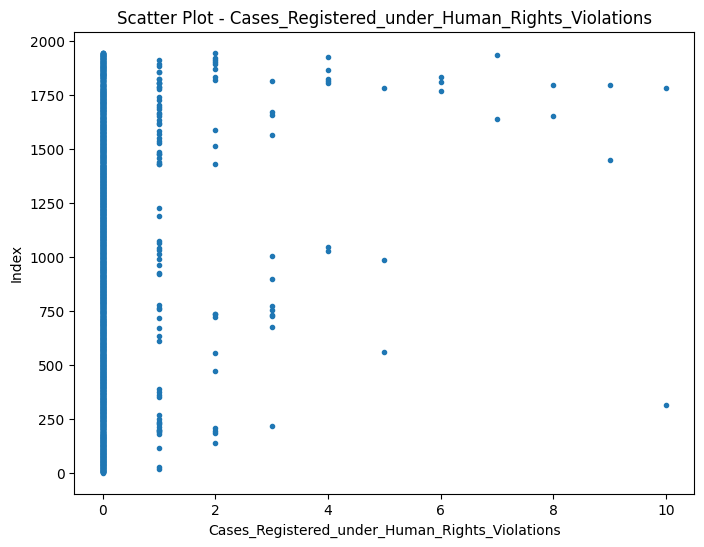

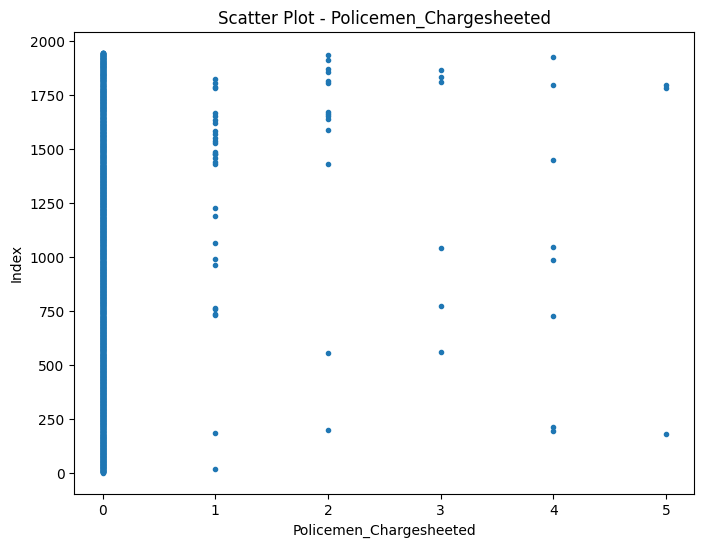

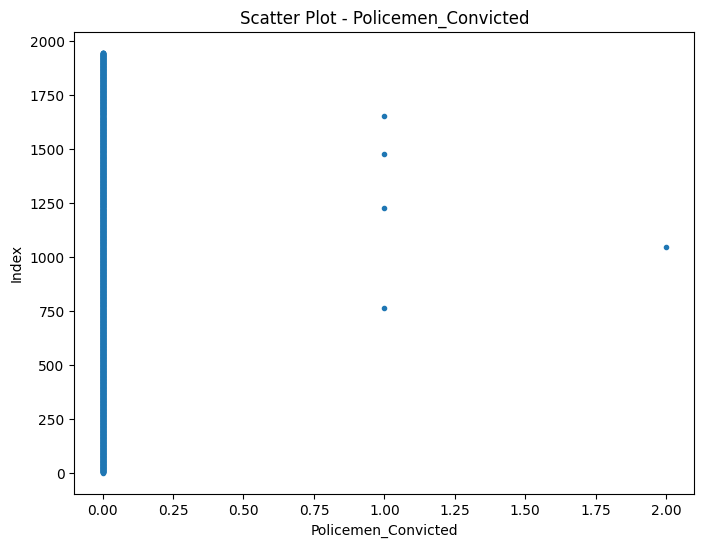

In [14]:
import matplotlib.pyplot as plt

for column in df2.columns:
    if df2[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(df2[column], range(len(df2)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()


# encoding

In [15]:
df09 = df2.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df09['Area_Name'] = label.fit_transform(df09['Area_Name'])
df09['Group_Name'] = label.fit_transform(df09['Group_Name'])
df09['Sub_Group_Name'] = label.fit_transform(df09['Sub_Group_Name'])

In [33]:
df09

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,0,2001,1,0,0.0,0.0,0.0
1,1,2001,1,0,0.0,0.0,0.0
2,2,2001,1,0,0.0,0.0,0.0
3,3,2001,1,0,0.0,0.0,0.0
4,4,2001,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1943,17,2010,8,10,0.0,0.0,0.0
1944,19,2010,8,10,0.0,0.0,0.0
1945,20,2010,8,10,0.0,0.0,0.0
1946,24,2010,8,10,2.0,0.0,0.0


# Normalisation of data

In [34]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [35]:
ss = RobustScaler()
scaled = pd.DataFrame(ss.fit_transform(df09))

# after Normalisation spread of data

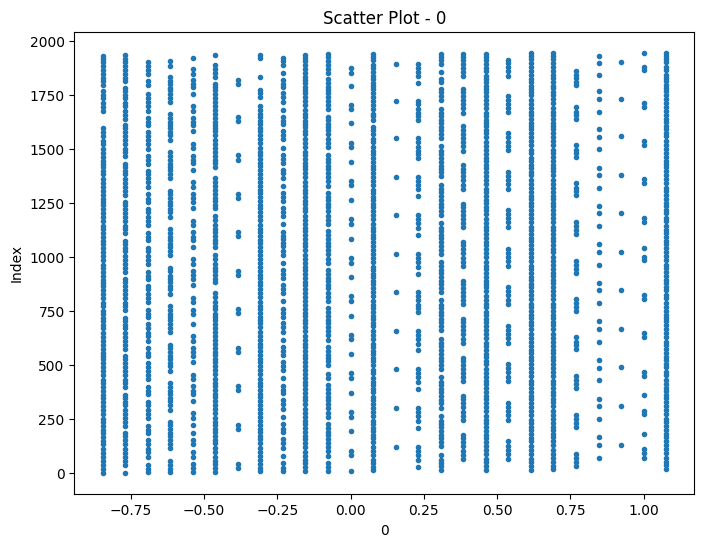

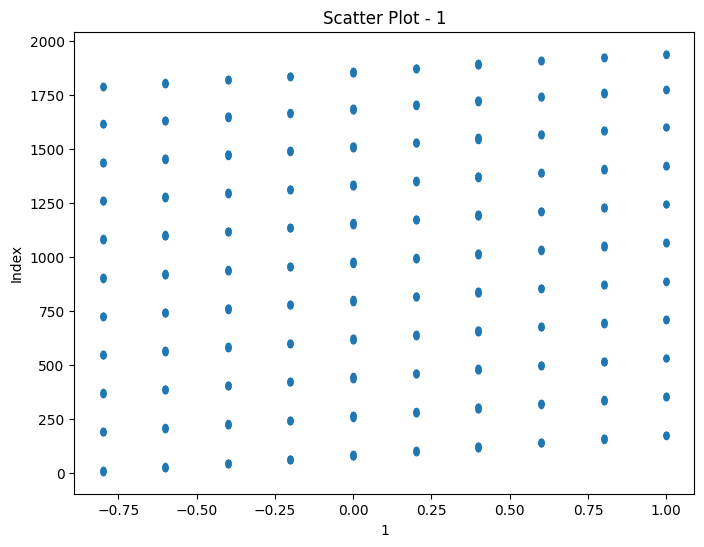

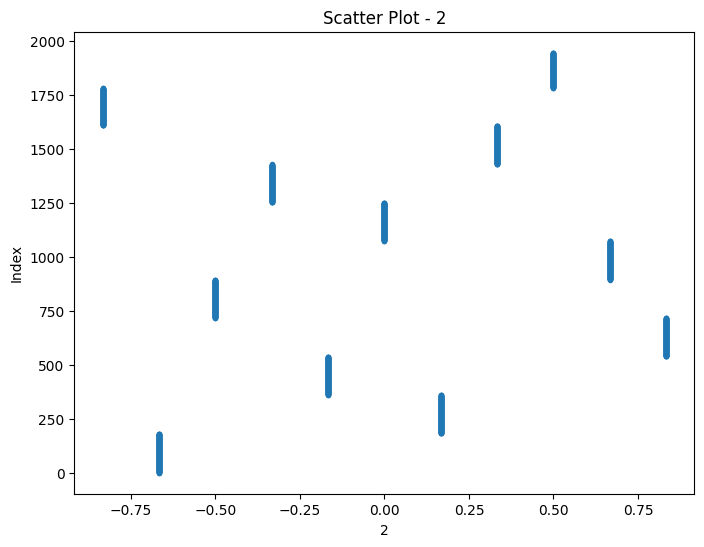

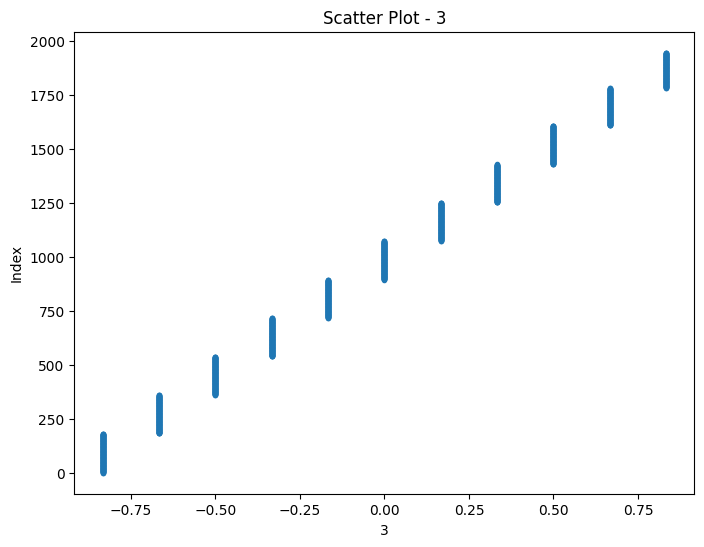

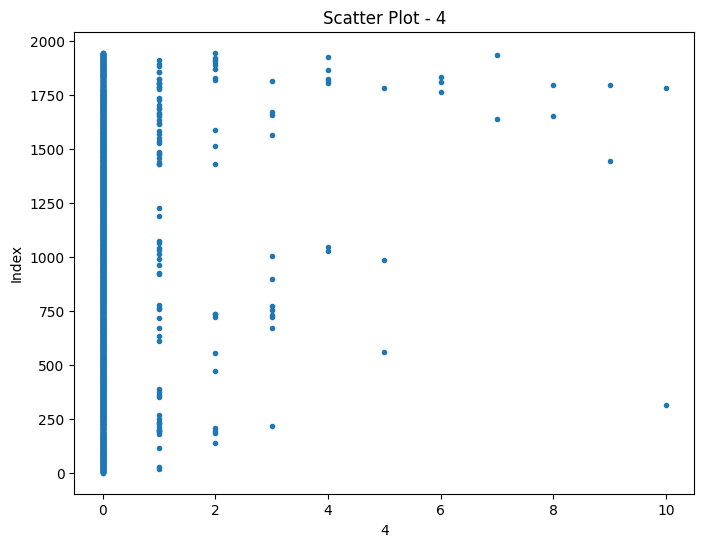

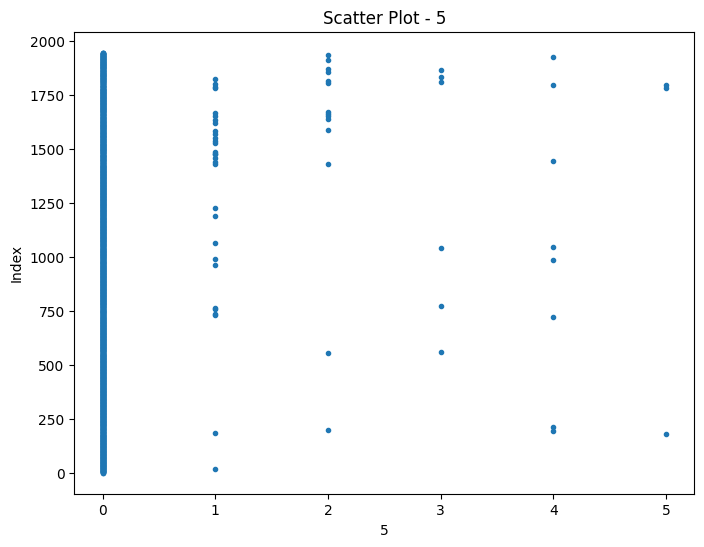

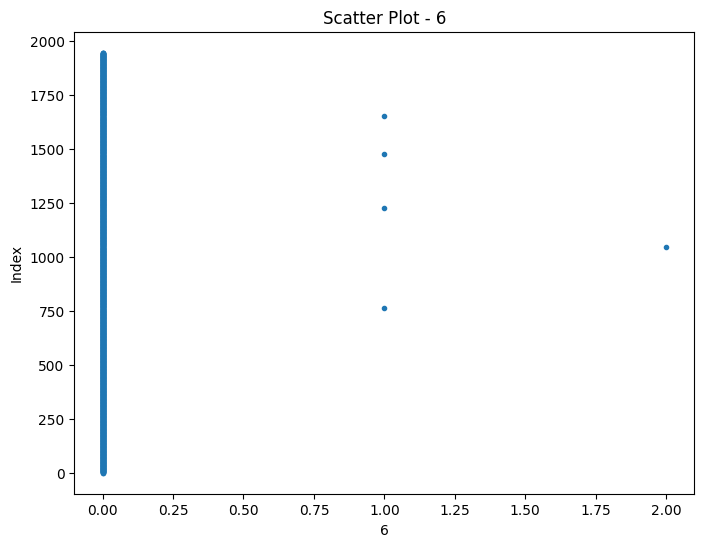

In [36]:
import matplotlib.pyplot as plt

for column in scaled.columns:
    if scaled[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(scaled[column], range(len(scaled)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()


# Elbow Method

In [37]:
from sklearn.cluster import KMeans

In [38]:
elbow = pd.DataFrame()

for i in range(1,15):
    kmean = KMeans(n_clusters=i, random_state=333)
    model = kmean.fit(scaled)
    elbow.at[i,'k'] = i
    elbow.at[i, 'inertia'] = round(model.inertia_)/10000000
print(elbow)
    

       k   inertia
1    1.0  0.000376
2    2.0  0.000283
3    3.0  0.000236
4    4.0  0.000207
5    5.0  0.000187
6    6.0  0.000166
7    7.0  0.000150
8    8.0  0.000138
9    9.0  0.000130
10  10.0  0.000122
11  11.0  0.000114
12  12.0  0.000108
13  13.0  0.000103
14  14.0  0.000098


Text(0, 0.5, 'inertia')

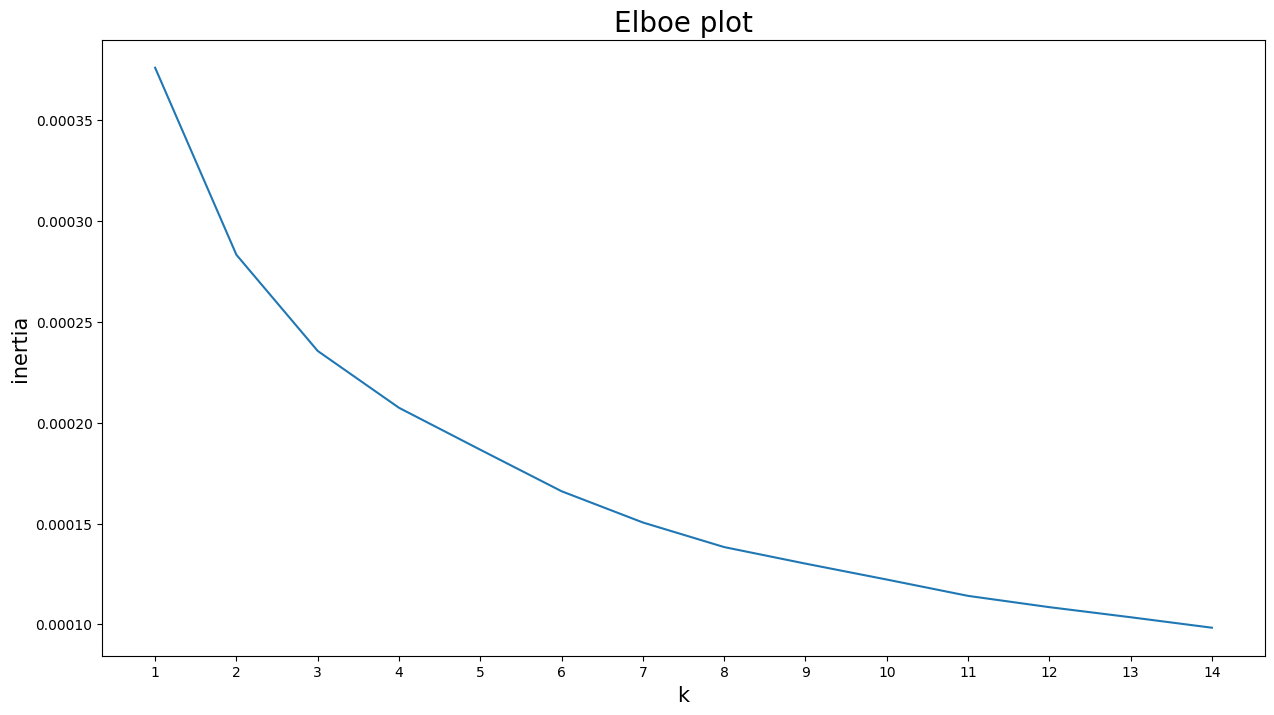

In [39]:
plt.figure(figsize=(15,8))
plt.title('Elboe plot', size=20)
plt.plot(elbow['k'], elbow['inertia'])
plt.xticks(elbow['k'])
plt.xlabel('k', size=15)
plt.ylabel('inertia', size=15)

# model Building

In [40]:
df1 = pd.DataFrame()
kmeans = KMeans(n_clusters = 5,  random_state = 42)

y_kmeans = kmeans.fit_predict(scaled)

df1['y_kmeans']=y_kmeans

df1['y_kmeans'].value_counts()

1    561
4    515
0    456
2    389
3     27
Name: y_kmeans, dtype: int64

# accuracy score 

In [41]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(scaled, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.19774337498436315


# DBSCAN

# Optimal Number of Epsilon

In [42]:
from sklearn.neighbors import NearestNeighbors
k = 5 
neighbors = NearestNeighbors(n_neighbors=k)


nb = neighbors.fit(scaled)
distance, indicate = nb.kneighbors(scaled)

In [43]:
distances = np.sort(distance, axis=0)

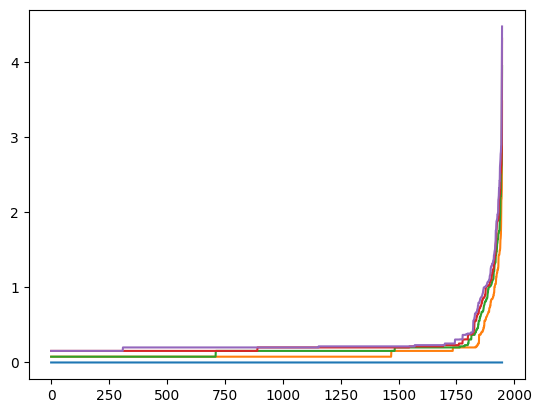

In [44]:
plt.plot(distances)

# model Building

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
db = DBSCAN(eps=1.9, min_samples=7)

In [47]:
db.fit(scaled)

DBSCAN(eps=1.9, min_samples=7)

In [48]:
clusters = db.labels_

In [49]:
len(set(clusters))

2

In [50]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(scaled, clusters)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.7724101358678481


# Hierarchical Clustring 

In [51]:
import scipy.cluster.hierarchy as shc

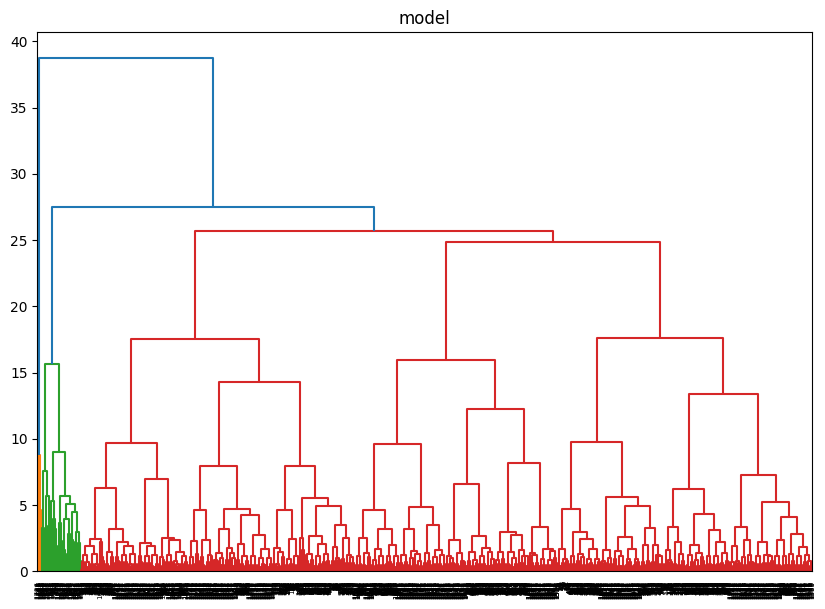

In [52]:
plt.figure(figsize=(10,7))
plt.title('model')
dend = shc.dendrogram(shc.linkage(scaled, method='ward'))

# model building

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [55]:
labels = cluster.fit_predict(scaled)

# accuracy check

In [56]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(scaled, labels)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.8013449386960461


# final 

In [59]:
as1 = labels.tolist()

In [60]:
final = df2.copy()

In [61]:
final1 = final.reset_index()
final2 = final1.drop(['index'], axis=1)

In [63]:
final2['mean'] = as1

In [65]:
cluster1 = final2[final2['mean']==0]
cluster2 = final2[final2['mean']==1]

# cluster1

In [66]:
cluster1

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted,mean
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0,0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0,0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0,0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0,0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
1943,Meghalaya,2010,HR_Others Violations by Police,11. Others,0.0,0.0,0.0,0
1944,Nagaland,2010,HR_Others Violations by Police,11. Others,0.0,0.0,0.0,0
1945,Odisha,2010,HR_Others Violations by Police,11. Others,0.0,0.0,0.0,0
1946,Uttar Pradesh,2010,HR_Others Violations by Police,11. Others,2.0,0.0,0.0,0


In [69]:
cluster2 

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted,mean
315,Chhattisgarh,2008,HR_Illegal detention/arrests,02. Illegal Detention/Arrests,10.0,0.0,0.0,1
1447,Andhra Pradesh,2002,HR_Indignity to Women,09. Indignity to Women,9.0,4.0,0.0,1
1639,Odisha,2002,HR_Atrocities on SC/ST,10. Atrocities on SC/ST,7.0,2.0,0.0,1
1652,Karnataka,2003,HR_Atrocities on SC/ST,10. Atrocities on SC/ST,8.0,2.0,0.0,1
1767,Odisha,2009,HR_Atrocities on SC/ST,10. Atrocities on SC/ST,6.0,0.0,0.0,1
1782,Odisha,2010,HR_Atrocities on SC/ST,10. Atrocities on SC/ST,5.0,1.0,0.0,1
1784,Arunachal Pradesh,2001,HR_Others Violations by Police,11. Others,10.0,5.0,0.0,1
1796,Punjab,2001,HR_Others Violations by Police,11. Others,8.0,5.0,0.0,1
1798,Andhra Pradesh,2002,HR_Others Violations by Police,11. Others,9.0,4.0,0.0,1
1809,Maharashtra,2002,HR_Others Violations by Police,11. Others,6.0,3.0,0.0,1
